In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('sales_data.csv')

In [24]:
print(df.head())
print(df.info())
print(df.describe())

            Order Date  Order ID                   Product   Product_ean  \
0  2019-01-22 21:25:00    141234                    iPhone  5.638009e+12   
1  2019-01-28 14:15:00    141235  Lightning Charging Cable  5.563320e+12   
2  2019-01-17 13:33:00    141236          Wired Headphones  2.113973e+12   
3  2019-01-05 20:33:00    141237          27in FHD Monitor  3.069157e+12   
4  2019-01-25 11:59:00    141238          Wired Headphones  9.692681e+12   

      catégorie                       Purchase Address  Quantity Ordered  \
0     Vêtements        944 Walnut St, Boston, MA 02215                 1   
1  Alimentation       185 Maple St, Portland, OR 97035                 1   
2     Vêtements  538 Adams St, San Francisco, CA 94016                 2   
3        Sports     738 10th St, Los Angeles, CA 90001                 1   
4  Électronique          387 10th St, Austin, TX 73301                 1   

   Price Each  Cost price  turnover    margin  
0      700.00    231.0000    700.00  4

In [25]:
import matplotlib.pyplot as plt

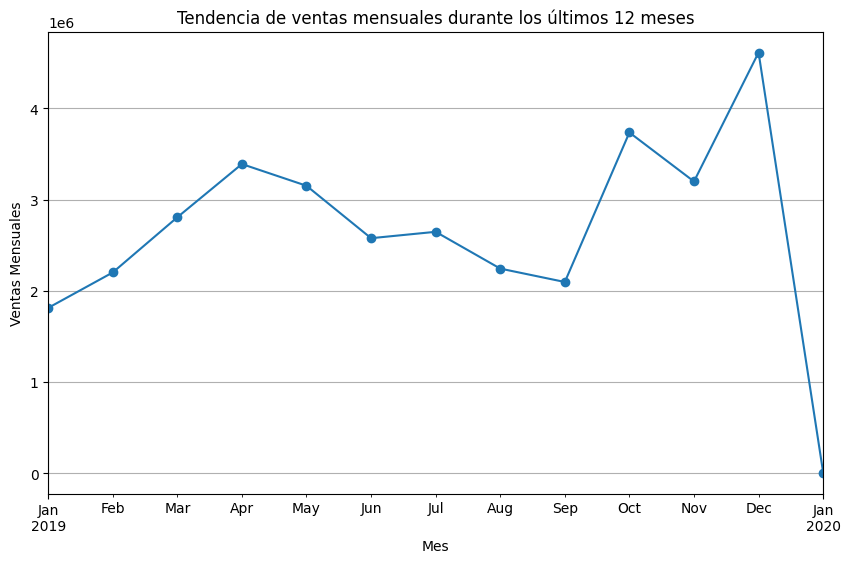

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  
df['Month'] = df['Order Date'].dt.to_period('M')  
monthly_sales = df.groupby('Month')['turnover'].sum()  
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Tendencia de ventas mensuales durante los últimos 12 meses')
plt.xlabel('Mes')
plt.ylabel('Ventas Mensuales')
plt.grid(True)
plt.show()

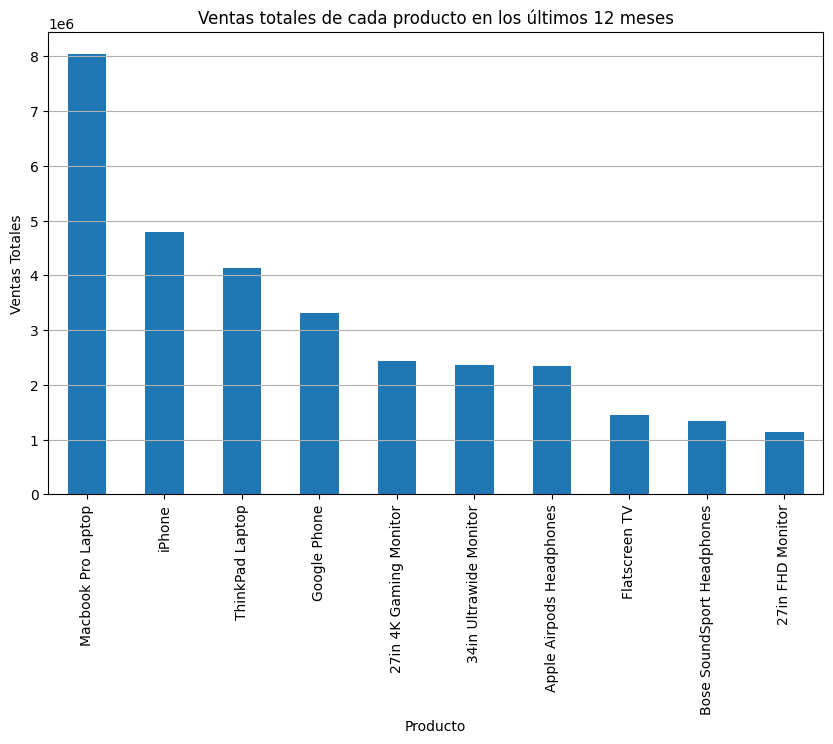

In [27]:
product_sales = df.groupby('Product')['turnover'].sum().sort_values(ascending=False)
product_sales.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Ventas totales de cada producto en los últimos 12 meses')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.grid(axis='y')
plt.show()


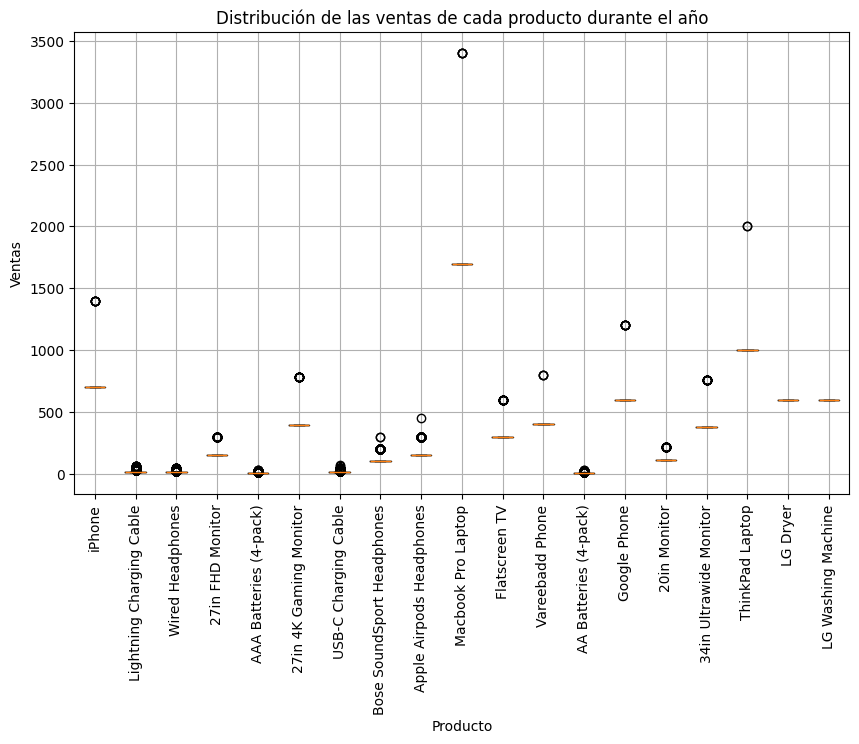

In [28]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Product'] == product]['turnover'] for product in df['Product'].unique()], labels=df['Product'].unique())
plt.title('Distribución de las ventas de cada producto durante el año')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

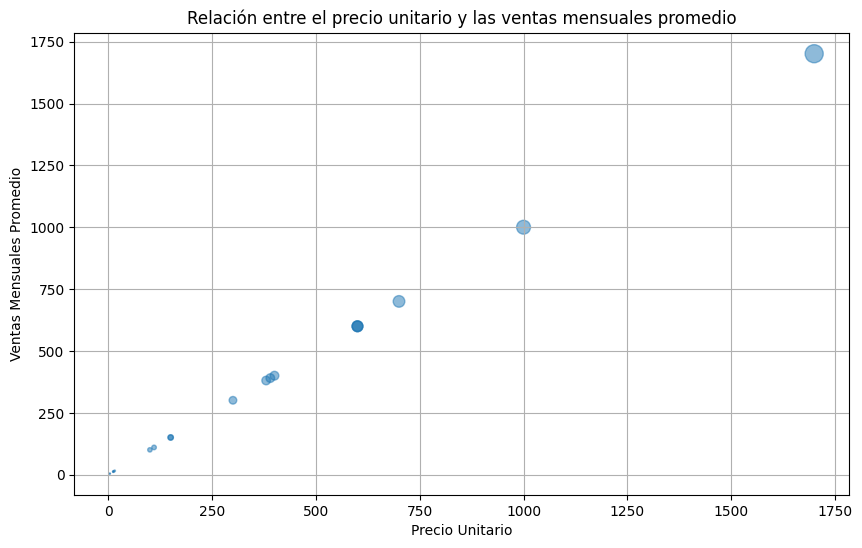

In [29]:
monthly_avg_sales = df.groupby('Product')['turnover'].mean()  
unit_prices = df.groupby('Product')['Price Each'].mean() 

plt.figure(figsize=(10, 6))
plt.scatter(unit_prices, monthly_avg_sales, s=monthly_avg_sales*0.1, alpha=0.5)
plt.title('Relación entre el precio unitario y las ventas mensuales promedio')
plt.xlabel('Precio Unitario')
plt.ylabel('Ventas Mensuales Promedio')
plt.grid(True)
plt.show()


Among all the products, the one with the highest sales was the MacBook Pro laptop. According to the data I plotted, its sales are close to 3500 units compared to other electronic products, which did not have the same sales as the Macs. Regarding the sales period, December 2019 was the best-selling month, and the following month, January 2020, had the lowest sales, with product sales plummeting. Lastly, the pattern that could be observed is that there might be a kind of relationship between demand and price. What I mean is, if a product is attractive at a worthy price, people will buy it. I feel that's what happened with the MacBook Pro laptop compared to other products, where marketing also plays a role. Well, that would be all from me.